In [1]:
import scvelo as scv
import unitvelo as utv

(Running UniTVelo 0.1.dev1+g1881f6e)
2022-03-26 13:59:25


In [4]:
def run_simulation(config=None):
    import scanpy as sc
    import pandas as pd
    from scipy.io import mmread
    
    spliced = mmread(f'simulated/spliced.mtx').tocsr()
    unspliced = mmread(f'simulated/unspliced.mtx').tocsr()
    data_path = f'simulated/dataset.h5ad'

    adata = sc.AnnData(spliced)
    adata.layers['spliced'] = spliced
    adata.layers['unspliced'] = unspliced

    adata.obs = pd.read_csv(f'simulated/cellinfo.csv')
    adata.obsm['X_umap'] = pd.read_csv(f'simulated/dimension.csv').iloc[:, 1:].values
    adata.write(data_path, compression='gzip')

    adata = utv.run_model(data_path, 'sim_time', config_file=config)
    return adata

In [3]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = False
velo_config.IROOT = None
velo_config.FIT_OPTION = '1'

-------> Model Configuration Settings <-------

 GPU: 2	FIG_DIR: ./figures/	BASE_FUNCTION: Gaussian	
 GENERAL: Curve	BASIS: None	N_TOP_GENES: 2000	
 OFFSET_GENES: False	FILTER_CELLS: False	EXAMINE_GENE: False	
 RESCALE_TIME: False	RESCALE_DATA: True	R2_ADJUST: False	
 IROOT: None	NUM_REPEAT: 1	FIT_OPTION: 1	
 DENSITY: SVD	REORDER_CELL: Soft_Reorder	AGGREGATE_T: True	
 ASSIGN_POS_U: False	WIN_SIZE: 50	LEARNING_RATE: 0.01	
 MAX_ITER: 10000	USE_RAW: False	RAW_GENES: False	

---> # of velocity genes used 151
---> # of velocity genes used 151
---> # of velocity genes used 151


  0%|          | 0/10000 [00:00<?, ?it/s]

 | 49,256,888649,397,98049,226,032

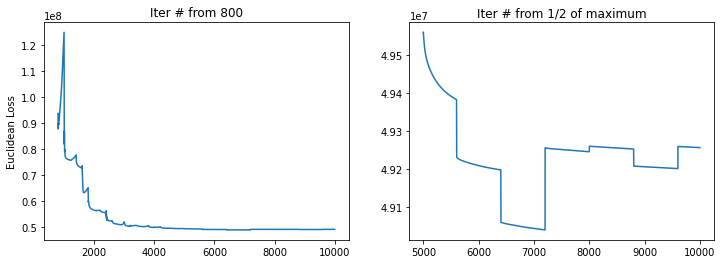

  0%|          | 0/2000 [00:00<?, ?cells/s]

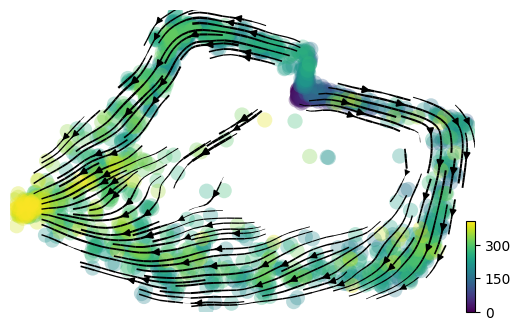

In [5]:
adata = run_simulation(config=velo_config)
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

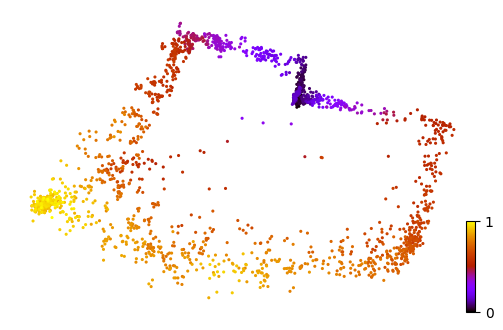

In [7]:
scv.pl.scatter(adata, color='latent_time_gm', color_map='gnuplot', size=20, dpi=100, title='')

In [8]:
subvar = adata.var.loc[adata.var['velocity_genes'] == True]
sub = adata[:, subvar.index]
ase = sub.var.sort_values(by=['fit_t0'], ascending=False)

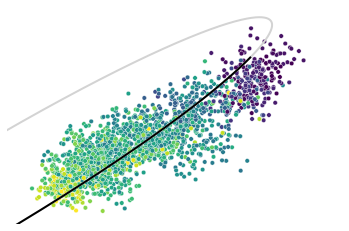

In [16]:
utv.pl.plot_range(ase.index[59], adata, velo_config, 
    show_legend=False, show_ax=False,
    t_left=0, t_right=1, time_metric='latent_time_gm')